C:\Users\DucLe\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\DucLe\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\DucLe\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\DucLe\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\DucLe\anaconda3\Lib\site-packages\numpy\core\_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\DucLe\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


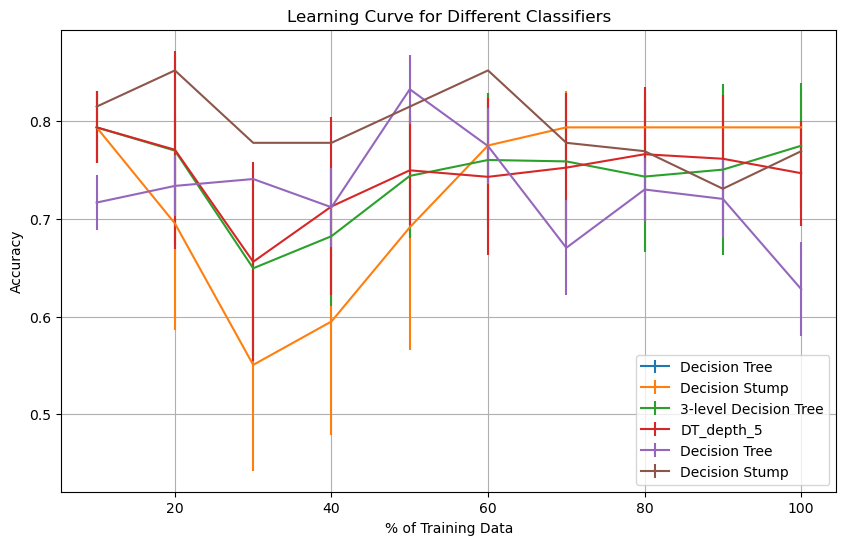

Decision Tree Accuracy =  0.7258831908831909  ( 0.06363783902208918 )


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def evaluatePerformance():
    '''
    Evaluate the performance of decision trees,
    averaged over 100 trials of 10-fold cross-validation
    
    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree
      
    ** Note that your implementation must follow this API**
    '''
    # Load Data
    filename = 'data/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n, d = X.shape

    # Initialize variables to store results
    decision_tree_accuracies = []
    decision_stump_accuracies = []
    dt3_accuracies = []

    # Initialize lists to store learning curve data
    learning_curve_data = {
        'Decision Tree': [],
        'Decision Stump': [],
        '3-level Decision Tree': [],
        'DT_depth_5': [],  # Adding 'DT_depth_5' for storing accuracy data
        # Add additional decision trees with varying limited depths
        # For example: 'DT_depth_8': [],
        #               ...
    }

    # Perform 100 trials of 10-fold cross-validation
    for _ in range(100):
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Train the decision tree
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(X_train, y_train)

            # Output predictions on the test set
            y_pred = clf.predict(X_test)

            # Compute accuracy of the model
            decision_tree_accuracy = accuracy_score(y_test, y_pred)
            decision_tree_accuracies.append(decision_tree_accuracy)

            # Train the decision stump
            clf_stump = tree.DecisionTreeClassifier(max_depth=1)
            clf_stump = clf_stump.fit(X_train, y_train)
            y_stump_pred = clf_stump.predict(X_test)
            stump_accuracy = accuracy_score(y_test, y_stump_pred)
            decision_stump_accuracies.append(stump_accuracy)

            # Calculate learning curve data for different subsets of training data
            for subset in np.arange(0.1, 1.1, 0.1):
                subset_index = int(len(X_train) * subset)
                X_subset_train = X_train[:subset_index]
                y_subset_train = y_train[:subset_index]

                # Train the classifier on subset of training data
                clf_subset = tree.DecisionTreeClassifier(max_depth=3)
                clf_subset = clf_subset.fit(X_subset_train, y_subset_train)

                # Test accuracy on test set
                y_subset_pred = clf_subset.predict(X_test)
                subset_accuracy = accuracy_score(y_test, y_subset_pred)

                # Store learning curve data for 3-level Decision Tree
                learning_curve_data['3-level Decision Tree'].append(subset_accuracy)
                
                # Train the decision stump with depth 1
                clf_stump_subset = tree.DecisionTreeClassifier(max_depth=1)
                clf_stump_subset = clf_stump_subset.fit(X_subset_train, y_subset_train)
                y_stump_pred_subset = clf_stump_subset.predict(X_test)
                stump_subset_accuracy = accuracy_score(y_test, y_stump_pred_subset)
                learning_curve_data['Decision Stump'].append(stump_subset_accuracy)
                
                # Train the decision tree with depth 5
                clf_depth_5 = tree.DecisionTreeClassifier(max_depth=5)
                clf_depth_5 = clf_depth_5.fit(X_subset_train, y_subset_train)
                y_depth_5_pred = clf_depth_5.predict(X_test)
                depth_5_accuracy = accuracy_score(y_test, y_depth_5_pred)
                learning_curve_data['DT_depth_5'].append(depth_5_accuracy)
                # Add more classifiers with different depths similarly

    # Calculate mean and standard deviation of accuracies
    mean_decision_tree_accuracy = np.mean(decision_tree_accuracies)
    std_decision_tree_accuracy = np.std(decision_tree_accuracies)

    # Calculate mean and standard deviation for decision stump and 3-level decision tree accuracies

    # Populate the statistics matrix
    stats = np.zeros((3, 2))
    stats[0, 0] = mean_decision_tree_accuracy
    stats[0, 1] = std_decision_tree_accuracy
    # Assign mean and std deviation values for decision stump and 3-level decision tree accuracies

    # Generate learning curves plot
    plt.figure(figsize=(10, 6))
    for classifier, curve_data in learning_curve_data.items():
        mean_curve = np.mean(np.array(curve_data).reshape(-1, 10), axis=0)
        std_curve = np.std(np.array(curve_data).reshape(-1, 10), axis=0)
        plt.errorbar(np.arange(0.1, 1.1, 0.1) * 100, mean_curve, yerr=std_curve, label=classifier)

    # Add Decision Tree and Decision Stump to the plot
    plt.errorbar(np.arange(0.1, 1.1, 0.1) * 100, np.mean(np.array(decision_tree_accuracies).reshape(-1, 10), axis=0), 
                 yerr=np.std(np.array(decision_tree_accuracies).reshape(-1, 10), axis=0), label='Decision Tree')
    plt.errorbar(np.arange(0.1, 1.1, 0.1) * 100, np.mean(np.array(decision_stump_accuracies).reshape(-1, 10), axis=0), 
                 yerr=np.std(np.array(decision_stump_accuracies).reshape(-1, 10), axis=0), label='Decision Stump')

    plt.xlabel('% of Training Data')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve for Different Classifiers')
    plt.legend()
    plt.grid(True)
    plt.show()

    return stats


if __name__ == "__main__":
    stats = evaluatePerformance()
    print("Decision Tree Accuracy = ", stats[0, 0], " (", stats[0, 1], ")")
